In [3]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from scipy import ndimage

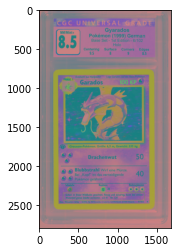

In [14]:
# root_path = os.path.join('data', 'cgc', '3789366028', 'front.jpg')
DATA_FOLDER = "/home/reidite/Dataset/PSA"
SELECTED_PART = "Part_01"
IMG_NAME_LST = ['3789366028', '3727258020',
                '3727258028', '3727258038',
                '3727258070']
                
SELECTED_IDX = 3
front_img_name = os.path.join(DATA_FOLDER, SELECTED_PART, 'images/cgc', IMG_NAME_LST[SELECTED_IDX], 'front.jpg')
back_img_name = os.path.join(DATA_FOLDER, SELECTED_PART, 'images/cgc', IMG_NAME_LST[SELECTED_IDX], 'back.jpg')

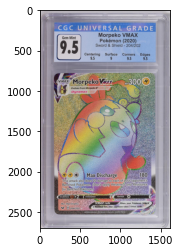

In [41]:
image = cv2.imread(front_img_name)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

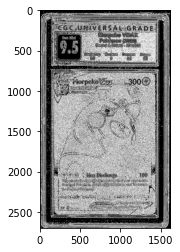

In [42]:
# threshold it
blur = cv2.GaussianBlur(gray, (3, 3), 0)
adaptive_binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,3)
grad_x = cv2.Sobel(adaptive_binary, cv2.CV_16S, 1, 0, ksize = 3, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(adaptive_binary, cv2.CV_16S, 0, 1, ksize = 3, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 1.0, abs_grad_y, 1.0, 0)
ret2, binarized_grad = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(binarized_grad, cv2.COLOR_BGR2RGB))

In [43]:
plt.imsave("test.png", binarized_grad)